### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

In [1]:
# write your code from here
!pip install pandas matplotlib seaborn numpy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


/tmp/ipykernel_7986/671318417.py:37: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


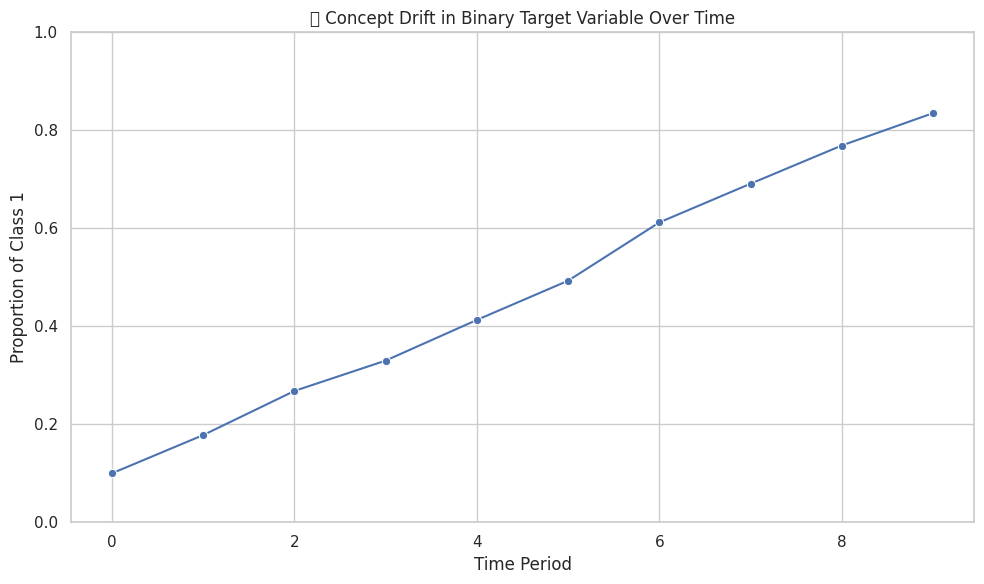

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulate data with concept drift
np.random.seed(42)
time_periods = 10
samples_per_period = 1000

data = []

for t in range(time_periods):
    # Gradually increase probability of class 1 (concept drift)
    p = 0.1 + 0.08 * t  # Starts at 0.1, ends at 0.9
    y = np.random.binomial(1, p, samples_per_period)
    df = pd.DataFrame({
        'time_period': t,
        'target': y
    })
    data.append(df)

# Combine all data
df_all = pd.concat(data, ignore_index=True)

# Step 2: Compute distribution over time
drift = df_all.groupby('time_period')['target'].mean().reset_index()

# Step 3: Plot the drift
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=drift, x='time_period', y='target', marker='o')
plt.title('📉 Concept Drift in Binary Target Variable Over Time')
plt.xlabel('Time Period')
plt.ylabel('Proportion of Class 1')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

